In [400]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import warnings
warnings.filterwarnings('ignore')

In [401]:
usecols = ['eventid', 'iyear','country_txt', 'region_txt',
       'provstate', 'city', 'latitude', 'longitude', 'success',
       'suicide', 'attacktype1', 'attacktype1_txt', 'gname', 'nperps',
       'nkill', 'nkillter', 'nwound', 'nwoundte', 'property','targsubtype1_txt','targtype1_txt']

In [402]:
terror = pd.read_csv("E://terror.csv",usecols=usecols, encoding = 'ISO-8859-1')

# EDA

In [403]:
terror.shape

(181691, 21)

In [404]:
terror.columns

Index(['eventid', 'iyear', 'country_txt', 'region_txt', 'provstate', 'city',
       'latitude', 'longitude', 'success', 'suicide', 'attacktype1',
       'attacktype1_txt', 'targtype1_txt', 'targsubtype1_txt', 'gname',
       'nperps', 'nkill', 'nkillter', 'nwound', 'nwoundte', 'property'],
      dtype='object')

In [405]:
terror.isna().sum()

eventid                 0
iyear                   0
country_txt             0
region_txt              0
provstate             421
city                  435
latitude             4556
longitude            4557
success                 0
suicide                 0
attacktype1             0
attacktype1_txt         0
targtype1_txt           0
targsubtype1_txt    10373
gname                   0
nperps              71115
nkill               10313
nkillter            66958
nwound              16311
nwoundte            69143
property                0
dtype: int64

In [406]:
terror.attacktype1.unique()

array([1, 6, 3, 7, 2, 4, 9, 8, 5], dtype=int64)

# Regions With Most Terror Activities

In [407]:
terror_reg  = terror.groupby('region_txt')['eventid'].count().sort_values(ascending =False).reset_index()

Text(0.5, 0, 'Event Count')

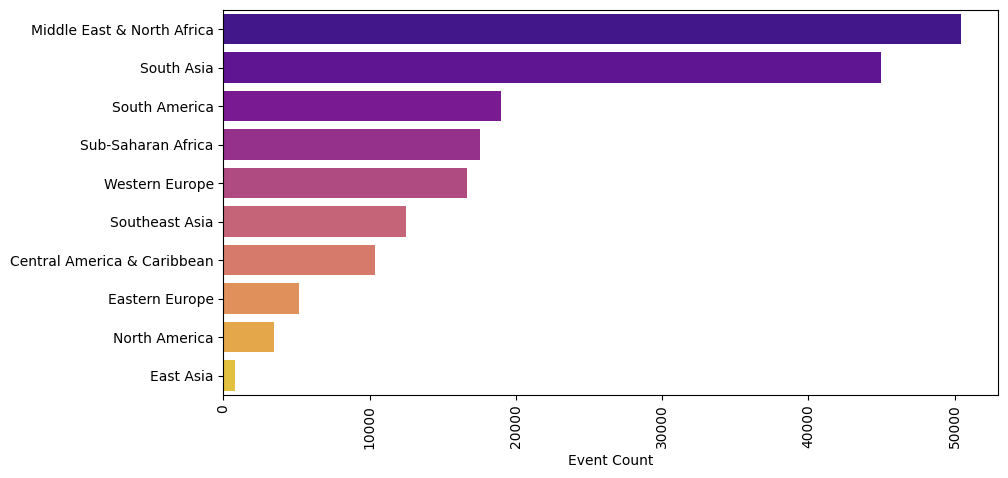

In [408]:
plt.figure(figsize =(10,5))
sns.barplot(y = terror_reg['region_txt'].head(10), x = terror_reg['eventid'].head(10),palette = 'plasma', hue = terror_reg['region_txt'].head(10) )
plt.xticks(rotation =90)
plt.ylabel('')
plt.xlabel("Event Count")

# Countries With Most Terror Activities

In [409]:
terror = terror.dropna(subset = 'country_txt', axis = 0)
terror_count =  terror.groupby('country_txt')['eventid'].count().sort_values(ascending =False).reset_index()
terror_count=terror_count.rename(columns ={"eventid":"event_count"})
terror_count.head()

,country_txt,event_count
0,Iraq,24636
1,Pakistan,14368
2,Afghanistan,12731
3,India,11960
4,Colombia,8306


Text(0.5, 1.0, 'Top 10 Countries with terror events since 1970')

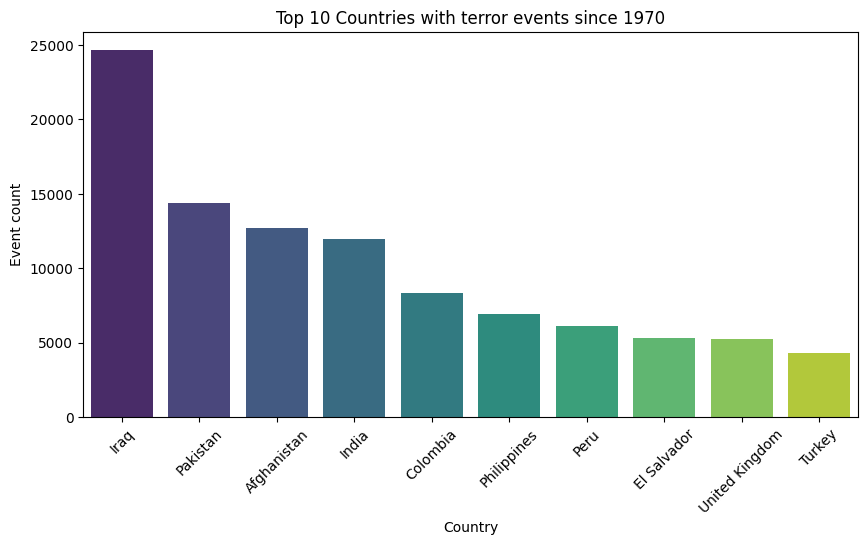

In [410]:
plt.figure(figsize =(10,5))
sns.barplot(x = terror_count['country_txt'].head(10), y = terror_count['event_count'].head(10),palette = 'viridis', hue = terror_count['country_txt'].head(10))
plt.xticks(rotation = 45)
plt.xlabel("Country")
plt.ylabel("Event count")
plt.title("Top 10 Countries with terror events since 1970")

# Iraq

In [411]:
terror_iraq = terror[terror['country_txt']=="Iraq"]

In [412]:
terror_iraq.head()

,eventid,iyear,country_txt,region_txt,provstate,city,latitude,longitude,success,suicide,...,attacktype1_txt,targtype1_txt,targsubtype1_txt,gname,nperps,nkill,nkillter,nwound,nwoundte,property
2854,197503010002,1975,Iraq,Middle East & North Africa,Nineveh,Mosul,36.354145,43.143570,1,0,...,Hijacking,Airports & Aircraft,Aircraft (not at an airport),Unknown,3.0,0.0,0.0,1.0,1.0,0
4385,197612150001,1976,Iraq,Middle East & North Africa,Baghdad,Baghdad,33.303566,44.371773,1,0,...,Bombing/Explosion,Airports & Aircraft,Airport,Unknown,NaN,10.0,NaN,285.0,NaN,1
4393,197612180001,1976,Iraq,Middle East & North Africa,Unknown,Penjwon,NaN,NaN,1,0,...,Hostage Taking (Kidnapping),Government (General),"Government Personnel (excluding police, military)",Kurdish Democratic Party-Iraq (KDP),NaN,0.0,NaN,0.0,NaN,0
4402,197612240001,1976,Iraq,Middle East & North Africa,Baghdad,Baghdad,33.303566,44.371773,1,0,...,Assassination,Violent Political Party,Party Official/Candidate/Other Personnel,Unknown,NaN,2.0,NaN,0.0,NaN,0
8688,197906150001,1979,Iraq,Middle East & North Africa,Basra,Basra,30.510054,47.778095,1,0,...,Assassination,Government (General),Politician or Political Party Movement/Meeting...,Unknown,1.0,1.0,NaN,0.0,NaN,0


In [413]:
terror_iraq=terror_iraq.dropna(subset = ['latitude', 'longitude'], axis = 0)

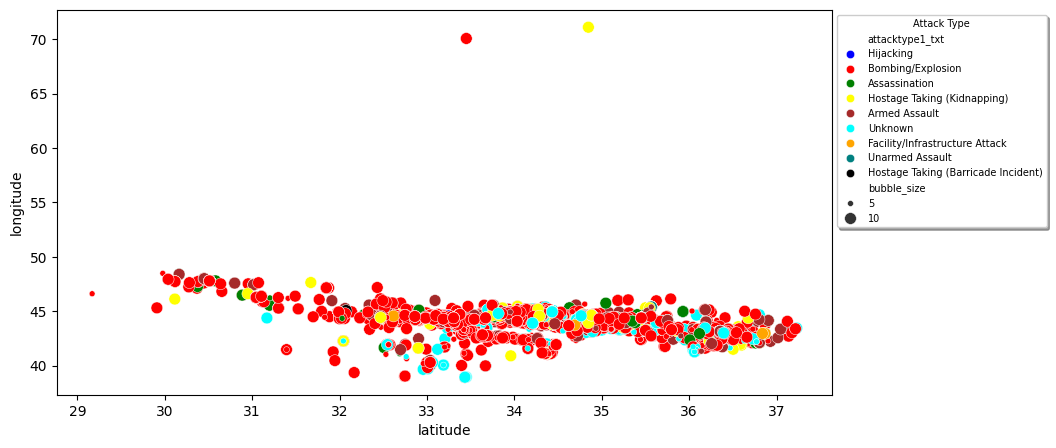

In [414]:
terror_iraq = terror_iraq.copy()
terror_iraq['longitude'] = pd.to_numeric(terror_iraq['longitude'])
terror_iraq['latitude'] = pd.to_numeric(terror_iraq['latitude'])
data = terror_iraq
successful_size = 10
failure = 5
terror_iraq['bubble_size'] = terror_iraq['success'].apply(lambda x: failure if x == 0 else successful_size)
terror_iraq['attacktype1'] = terror_iraq['attacktype1_txt'].astype('category')
custom_palette = {'Bombing/Explosion':'red', "Hijacking":'blue','Assassination':'green', 'Hostage Taking (Kidnapping)':'yellow',"Armed Assault":'Brown',
                  'Unknown':'cyan', 'Facility/Infrastructure Attack':'Orange', 'Unarmed Assault':'teal','Hostage Taking (Barricade Incident)':'black'}
plt.figure(figsize =(10,5))
sns.scatterplot(y= 'longitude', x = 'latitude', palette = custom_palette, hue = 'attacktype1_txt', data = data , size = 'bubble_size')
plt.legend(
    title='Attack Type',
    title_fontsize='7',
    loc='upper left',
    fontsize='7',
    bbox_to_anchor=(1,1),
    frameon=True,
    shadow=True,
)


In [415]:
terror_iraq_year = terror_iraq.groupby('iyear')['eventid'].count().reset_index()
terror_iraq_year.head()

,iyear,eventid
0,1975,1
1,1976,2
2,1979,1
3,1980,6
4,1981,3


# Year on Year Terror Activity Count

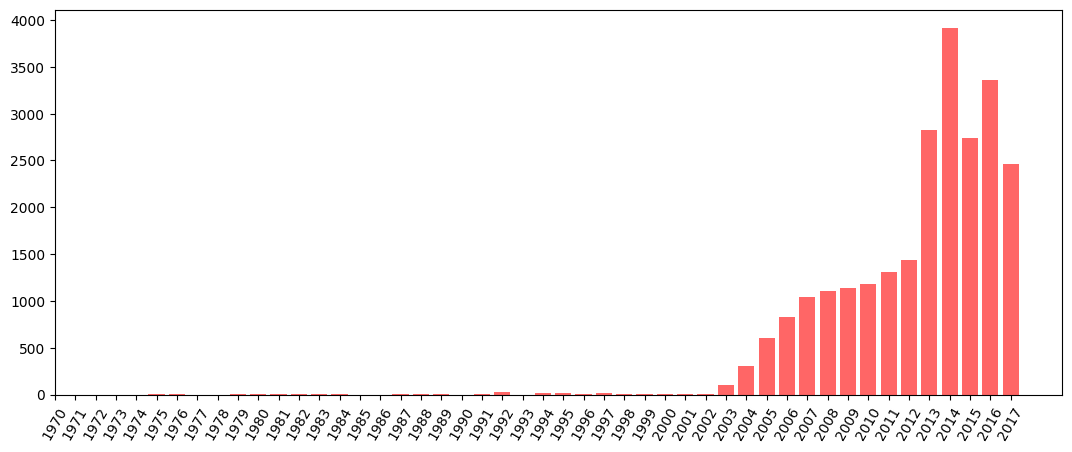

In [416]:
plt.figure(figsize = (13,5))
plt.bar(terror_iraq_year['iyear'], terror_iraq_year['eventid'], color = 'red', alpha = 0.6)
plt.xticks(range(1970,2018, 1), rotation = 60);

In [417]:
# %of different type of attacks
terror_iraq.attacktype1_txt.unique()

array(['Hijacking', 'Bombing/Explosion', 'Assassination',
       'Hostage Taking (Kidnapping)', 'Armed Assault', 'Unknown',
       'Facility/Infrastructure Attack', 'Unarmed Assault',
       'Hostage Taking (Barricade Incident)'], dtype=object)

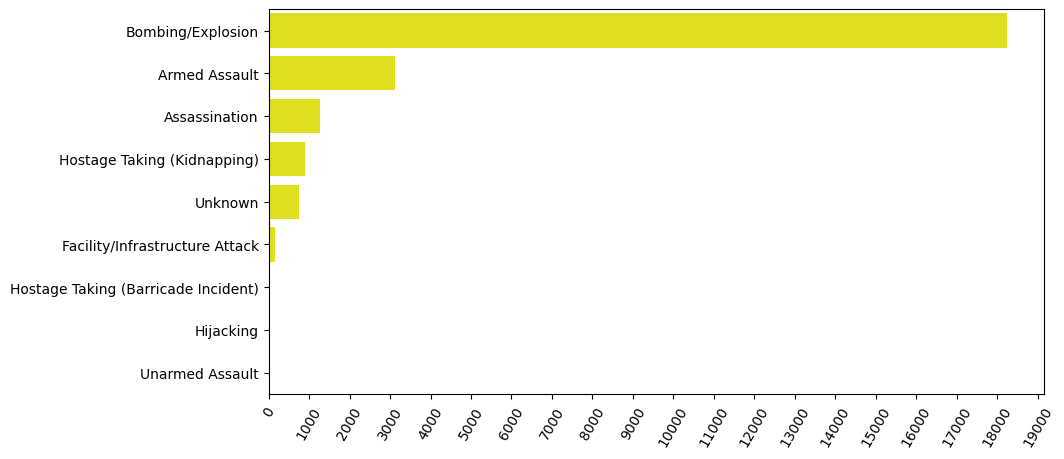

In [418]:
value_counts  = terror_iraq['attacktype1_txt'].value_counts().reset_index()
value_counts.columns = ['attacktype1_txt', 'count']
plt.figure(figsize =(10,5))
sns.barplot(y  = 'attacktype1_txt', x = 'count', data = value_counts, color = 'yellow')
#plt.xticks(rotation = 60 )
plt.xlabel('')
plt.ylabel('')
plt.xticks(range(0,20000,1000), rotation = 60);

In [419]:
terror_iraq['attacktype1_txt'].value_counts()

attacktype1_txt
Bombing/Explosion                      18232
Armed Assault                           3121
Assassination                           1272
Hostage Taking (Kidnapping)              909
Unknown                                  757
Facility/Infrastructure Attack           153
Hostage Taking (Barricade Incident)       24
Hijacking                                 13
Unarmed Assault                            6
Name: count, dtype: int64

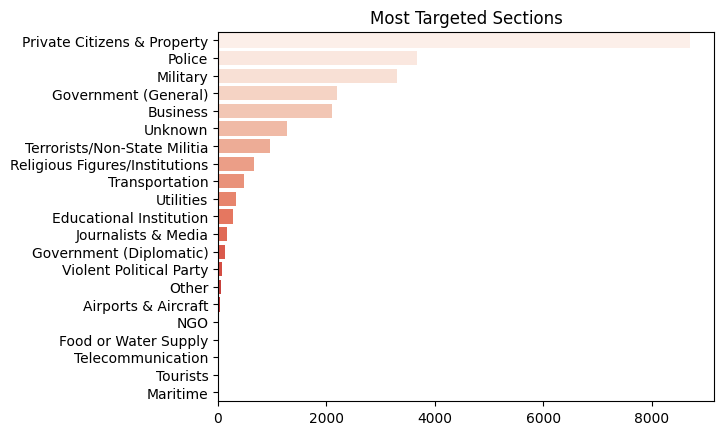

In [420]:
count = terror_iraq['targtype1_txt'].value_counts().reset_index()
count.columns = ['Target', 'Count']
data = count
sns.barplot(x='Count', y = 'Target', data = count, palette ='Reds', hue = 'Target' )
plt.xlabel('')
plt.ylabel('')
plt.title("Most Targeted Sections");

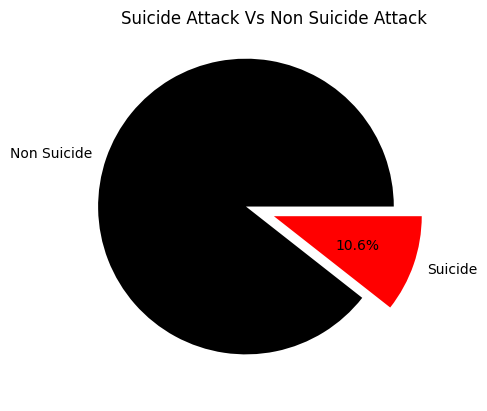

In [421]:
sizes =  terror_iraq['suicide'].value_counts()
labels =  ['Non Suicide', 'Suicide']
colors = ["Black", "Red"]
plt.pie(sizes, labels=labels, autopct = "%1.1f%%", explode = (0.2,0), colors= colors);
plt.title("Suicide Attack Vs Non Suicide Attack");

In [422]:
terror_iraq['suicide'].value_counts()

suicide
0    21893
1     2594
Name: count, dtype: int64

In [423]:
terror_iraq['gname'].unique()
terror_iraq_gp = terror_iraq.groupby('gname')['eventid'].count().sort_values(ascending = False).reset_index()
terror_iraq_gp.head(20)

,gname,eventid
0,Unknown,18427
1,Islamic State of Iraq and the Levant (ISIL),4781
2,Al-Qaida in Iraq,629
3,Islamic State of Iraq (ISI),145
4,Asa'ib Ahl al-Haqq,67
5,Gunmen,57
6,Tawhid and Jihad,43
7,Al-Naqshabandiya Army,35
8,Muslim extremists,32
9,Ansar al-Islam,27


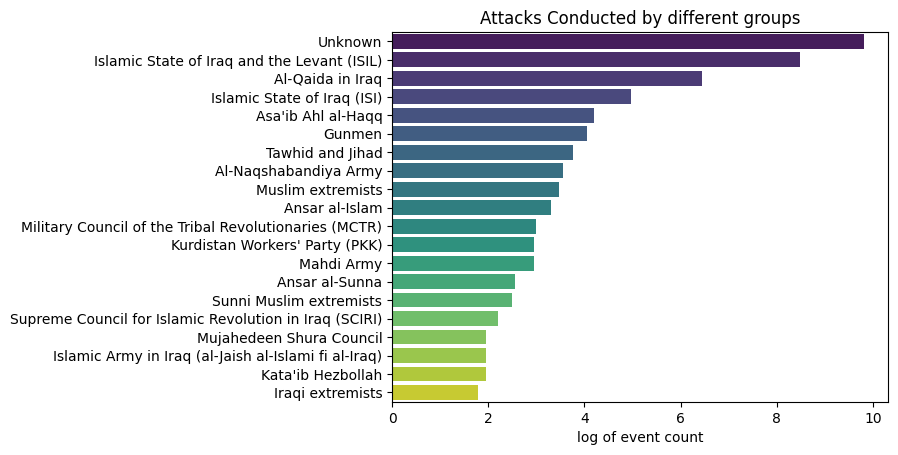

In [424]:
import numpy as np
data = terror_iraq_gp.head(20)
data['eventid'] =  np.log(data['eventid'])
sns.barplot(x  = 'eventid', y  ='gname', palette = 'viridis', hue = 'gname', data = data)
plt.xlabel('log of event count')
plt.ylabel('')
plt.title('Attacks Conducted by different groups');

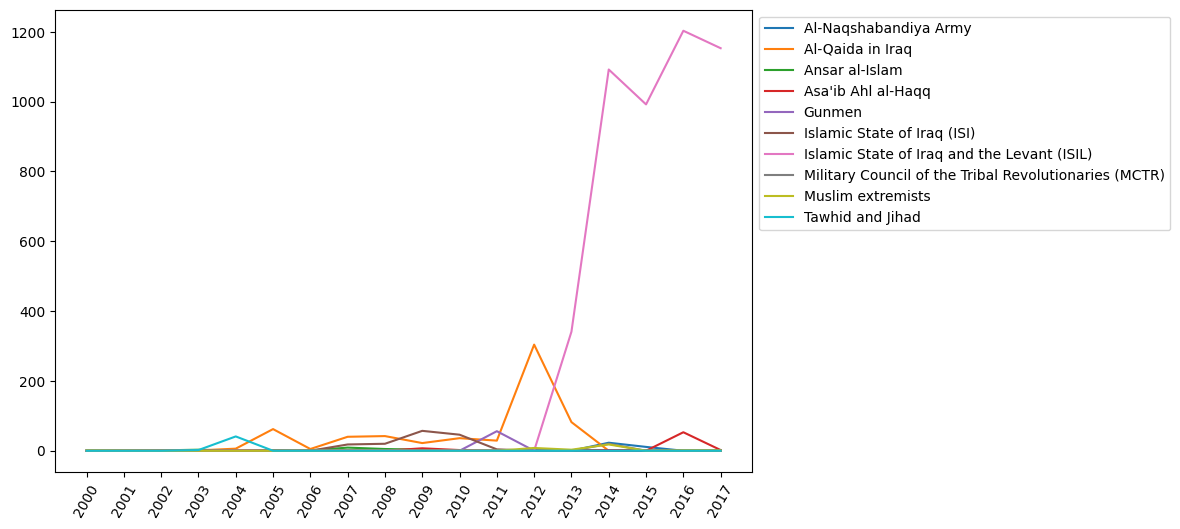

In [425]:
terror_iraq_group10 = terror_iraq[terror_iraq['gname'].isin(terror_iraq['gname'].value_counts()[1:11].index)]
terror_activity = pd.crosstab(terror_iraq_group10.iyear, terror_iraq_group10.gname)
plt.figure(figsize =(9,6))
for column in terror_activity.columns:
    plt.plot(terror_activity[column], label = column);
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(range(2000,2018,1),rotation = 60);

# Cities Terror Activity Analysis

In [426]:
terror_iraq_city  = terror_iraq.groupby('city')['eventid'].count().reset_index().sort_values(by = "eventid",ascending =False).reset_index(drop =True)

In [427]:
terror_iraq_city.head(10)

,city,eventid
0,Baghdad,7585
1,Mosul,2265
2,Kirkuk,925
3,Baqubah,745
4,Fallujah,579
5,Ramadi,509
6,Unknown,446
7,Tikrit,418
8,Abu Ghraib,324
9,Tuz Khormato,277


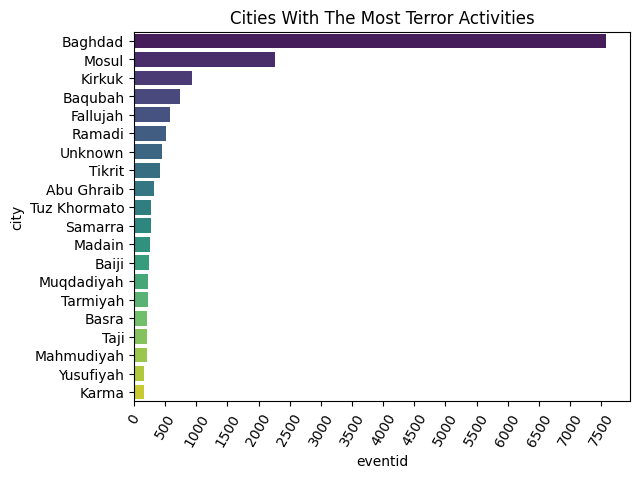

In [428]:
data = terror_iraq_city.head(20)
sns.barplot(y = 'city', x= 'eventid', data=data, palette = 'viridis', hue = terror_iraq_city['city'].head(20))
plt.title("Cities With The Most Terror Activities")
plt.xticks(range(0,8000,500), rotation = 60);

# Baghdad

In [429]:
terror_baghdad  =  terror_iraq[terror_iraq['city']=='Baghdad']
terror_baghdad.shape

(7585, 22)

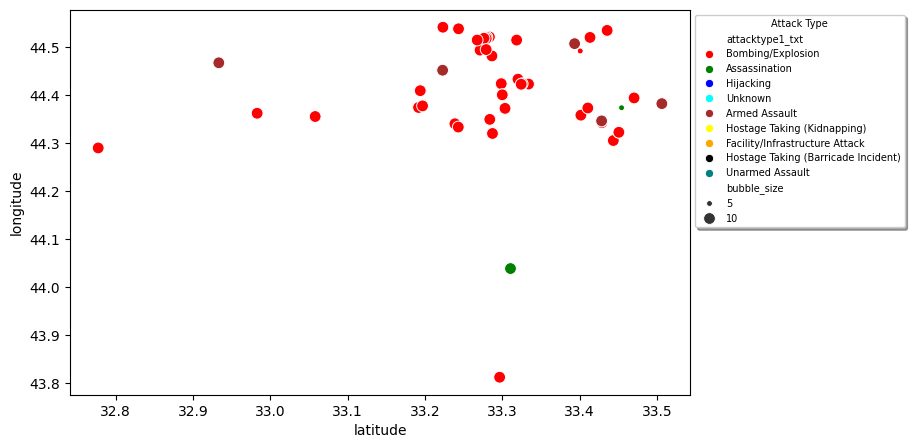

In [430]:
terror_baghdad = terror_baghdad.copy()
terror_baghdad['longitude'] = pd.to_numeric(terror_iraq['longitude'])
terror_baghdad['latitude'] = pd.to_numeric(terror_iraq['latitude'])
data = terror_baghdad
successful_size = 10
failure = 5
terror_baghdad['bubble_size'] = terror_baghdad['success'].apply(lambda x: failure if x == 0 else successful_size)
terror_baghdad['attacktype1'] = terror_baghdad['attacktype1_txt'].astype('category')
custom_palette = {'Bombing/Explosion':'red', "Hijacking":'blue','Assassination':'green', 'Hostage Taking (Kidnapping)':'yellow',"Armed Assault":'Brown',
                  'Unknown':'cyan', 'Facility/Infrastructure Attack':'Orange', 'Unarmed Assault':'teal','Hostage Taking (Barricade Incident)':'black'}
plt.figure(figsize =(8,5))
sns.scatterplot(y= 'longitude', x = 'latitude', palette = custom_palette, hue = 'attacktype1_txt', data = data , size = 'bubble_size')
plt.legend(
    title='Attack Type',
    title_fontsize='7',
    loc='upper left',
    fontsize='7',
    bbox_to_anchor=(1,1),
    frameon=True,
    shadow=True,
);

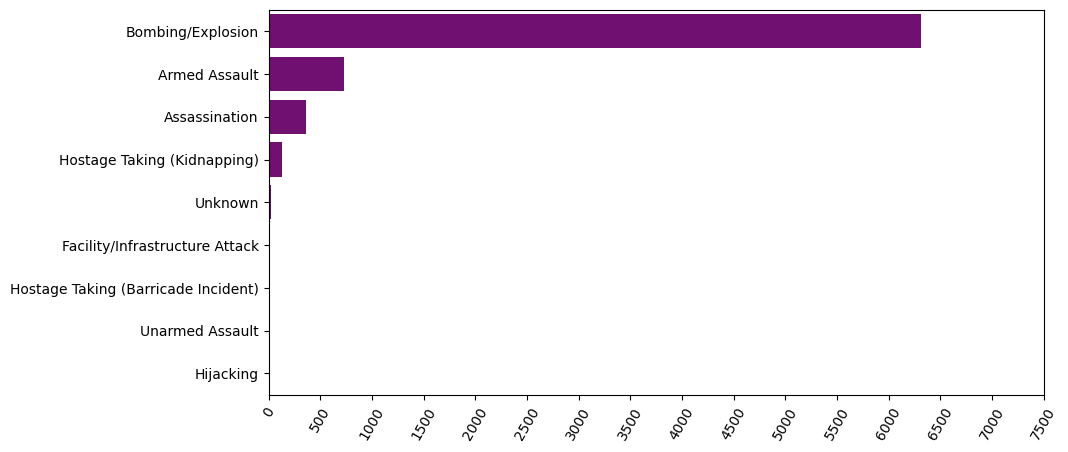

In [561]:
value_counts  = terror_baghdad['attacktype1_txt'].value_counts().reset_index()
value_counts.columns = ['attacktype1_txt', 'count']
plt.figure(figsize =(10,5))
sns.barplot(y  = 'attacktype1_txt', x = 'count', data = value_counts, color = 'purple')
plt.xlabel('')
plt.ylabel('')
plt.xticks(range(0,8000,500), rotation = 60);

In [432]:
terror_baghdad['attacktype1_txt'].value_counts()

attacktype1_txt
Bombing/Explosion                      6313
Armed Assault                           729
Assassination                           366
Hostage Taking (Kidnapping)             133
Unknown                                  23
Facility/Infrastructure Attack           14
Hostage Taking (Barricade Incident)       4
Unarmed Assault                           2
Hijacking                                 1
Name: count, dtype: int64

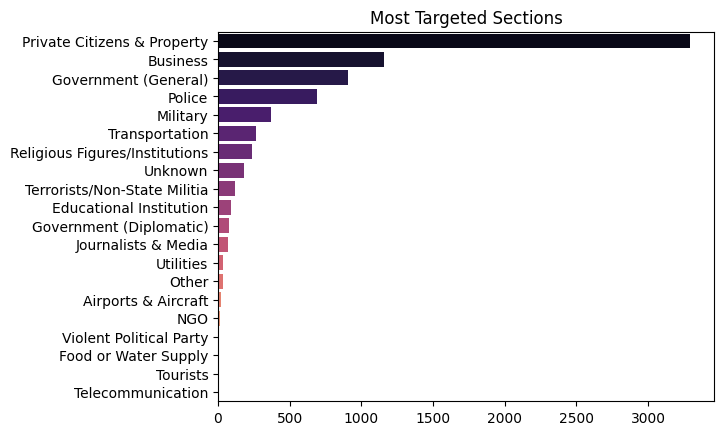

In [433]:
count = terror_baghdad['targtype1_txt'].value_counts().reset_index()
count.columns = ['Target', 'Count']
data = count
sns.barplot(x='Count', y = 'Target', data = count, palette ='magma', hue = 'Target' )
plt.xlabel('')
plt.ylabel('')
plt.title("Most Targeted Sections");

# Pakistan

In [434]:
terror_pak = terror[terror['country_txt']=="Pakistan"]

In [435]:
terror_pak.head()

,eventid,iyear,country_txt,region_txt,provstate,city,latitude,longitude,success,suicide,...,attacktype1_txt,targtype1_txt,targsubtype1_txt,gname,nperps,nkill,nkillter,nwound,nwoundte,property
585,197011010001,1970,Pakistan,South Asia,Sindh,Karachi,24.891115,67.143311,1,0,...,Assassination,Government (Diplomatic),"Diplomatic Personnel (outside of embassy, cons...",Unknown,1.0,4.0,0.0,20.0,0.0,0
2217,197402020001,1974,Pakistan,South Asia,Sindh,Karachi,24.891115,67.143311,1,0,...,Bombing/Explosion,Maritime,Commercial Maritime,Muslim Guerrillas,3.0,0.0,NaN,0.0,NaN,0
2705,197412090001,1974,Pakistan,South Asia,North-West Frontier Province,Peshawar,34.006004,71.537430,1,0,...,Bombing/Explosion,Government (Diplomatic),Embassy/Consulate,Unknown,NaN,0.0,NaN,2.0,NaN,1
2744,197500000001,1975,Pakistan,South Asia,Punjab,Rawalpindi,33.594013,73.069077,1,0,...,Bombing/Explosion,Airports & Aircraft,Aircraft (not at an airport),Unknown,NaN,NaN,NaN,NaN,NaN,1
2795,197502080001,1975,Pakistan,South Asia,North-West Frontier Province,Peshawar,34.006004,71.537430,1,0,...,Assassination,Government (General),Politician or Political Party Movement/Meeting...,National Awami Party,NaN,1.0,NaN,0.0,NaN,0


In [436]:
terror_pak = terror_pak.dropna(subset = ['latitude', 'longitude'], axis = 0)

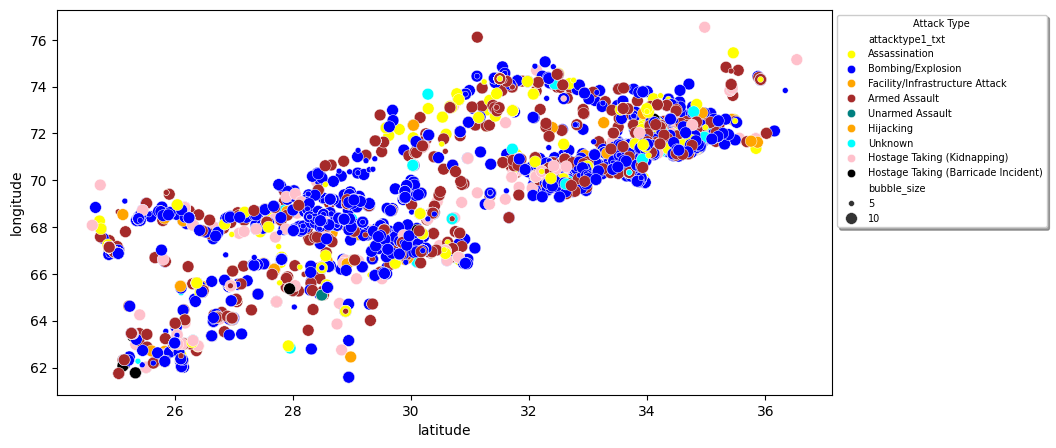

In [437]:
terror_pak = terror_pak.copy()
terror_pak['longitude'] = pd.to_numeric(terror_pak['longitude'])
terror_pak['latitude'] = pd.to_numeric(terror_pak['latitude'])
data = terror_pak
successful_size = 10
failure = 5
terror_pak['bubble_size'] = terror_pak['success'].apply(lambda x: failure if x == 0 else successful_size)
terror_pak['attacktype1'] = terror_pak['attacktype1_txt'].astype('category')
custom_palette = {'Bombing/Explosion':'blue', "Hijacking":'orange','Assassination':'yellow', 'Hostage Taking (Kidnapping)':'pink',"Armed Assault":'Brown',
                  'Unknown':'cyan', 'Facility/Infrastructure Attack':'Orange', 'Unarmed Assault':'teal','Hostage Taking (Barricade Incident)':'black'}
plt.figure(figsize =(10,5))
sns.scatterplot(y= 'longitude', x = 'latitude', palette = custom_palette, hue = 'attacktype1_txt', data = data , size = 'bubble_size')
plt.legend(
    title='Attack Type',
    title_fontsize='7',
    loc='upper left',
    fontsize='7',
    bbox_to_anchor=(1,1),
    frameon=True,
    shadow=True,
)


In [438]:
terror_pak_year = terror_iraq.groupby('iyear')['eventid'].count().reset_index()
terror_pak_year.head()

,iyear,eventid
0,1975,1
1,1976,2
2,1979,1
3,1980,6
4,1981,3


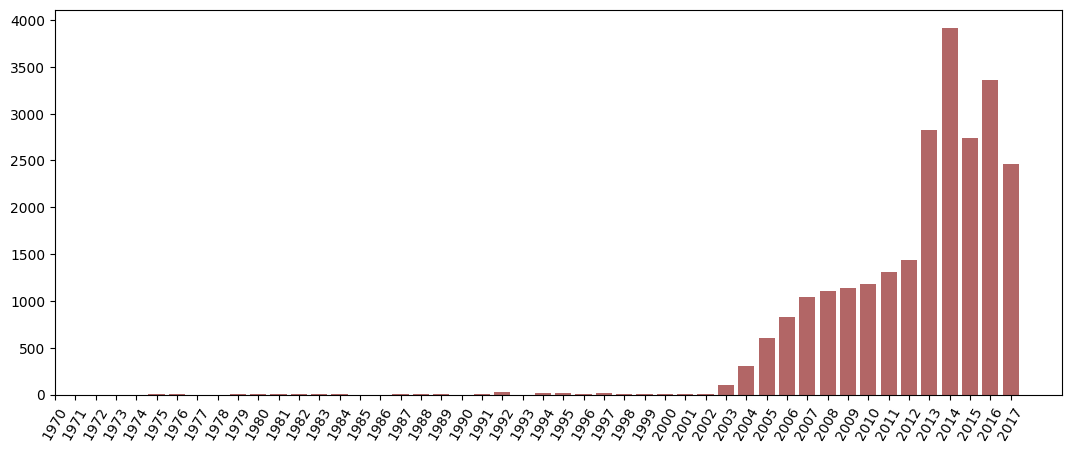

In [439]:
plt.figure(figsize = (13,5))
plt.bar(terror_pak_year['iyear'], terror_pak_year['eventid'], color = 'maroon', alpha = 0.6)
plt.xticks(range(1970,2018, 1), rotation = 60);

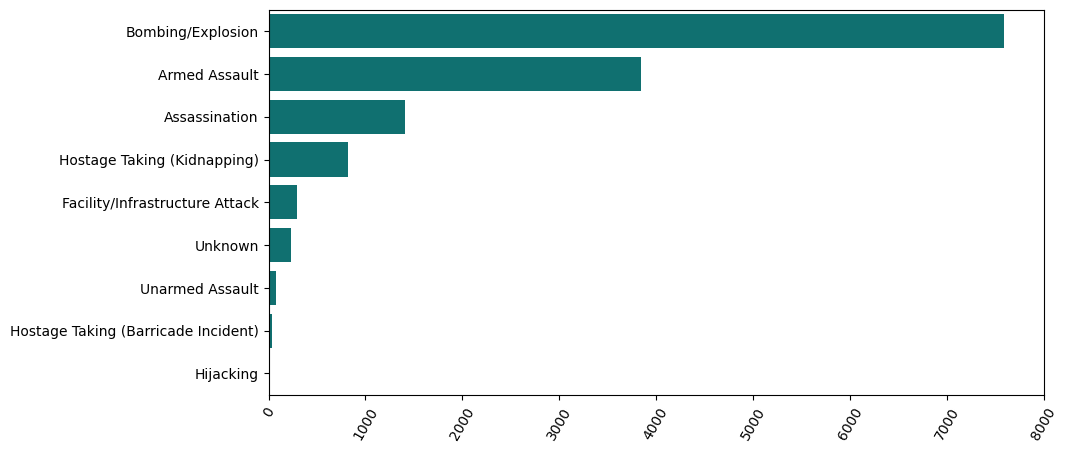

In [559]:
value_counts  = terror_pak['attacktype1_txt'].value_counts().reset_index()
value_counts.columns = ['attacktype1_txt', 'count']
plt.figure(figsize =(10,5))
sns.barplot(y  = 'attacktype1_txt', x = 'count', data = value_counts, color = 'teal')
#plt.xticks(rotation = 60 )
plt.xlabel('')
plt.ylabel('')
plt.xticks(range(0,9000,1000), rotation = 60);

In [441]:
terror_pak['attacktype1_txt'].value_counts()

attacktype1_txt
Bombing/Explosion                      7588
Armed Assault                          3845
Assassination                          1403
Hostage Taking (Kidnapping)             819
Facility/Infrastructure Attack          298
Unknown                                 234
Unarmed Assault                          77
Hostage Taking (Barricade Incident)      35
Hijacking                                19
Name: count, dtype: int64

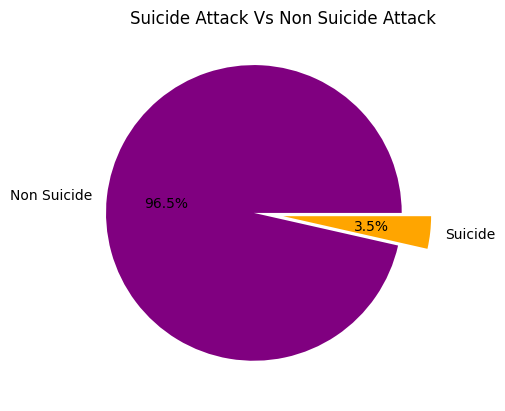

In [442]:
sizes =  terror_pak['suicide'].value_counts()
labels =  ['Non Suicide', 'Suicide']
colors = ["purple", "orange"]
plt.pie(sizes, labels=labels, autopct = "%1.1f%%", explode = (0.2,0), colors= colors);
plt.title("Suicide Attack Vs Non Suicide Attack");

In [443]:
terror_pak['suicide'].value_counts()

suicide
0    13811
1      507
Name: count, dtype: int64

In [444]:
terror_pak['gname'].unique()
terror_pak_gp = terror_pak.groupby('gname')['eventid'].count().sort_values(ascending = False).reset_index()
terror_pak_gp.head(20)

,gname,eventid
0,Unknown,10852
1,Tehrik-i-Taliban Pakistan (TTP),1333
2,Baloch Republican Army (BRA),312
3,Baloch Liberation Front (BLF),185
4,Baloch Liberation Army (BLA),181
5,Muttahida Qami Movement (MQM),174
6,Lashkar-e-Jhangvi,135
7,Lashkar-e-Islam (Pakistan),123
8,Khorasan Chapter of the Islamic State,96
9,United Baloch Army (UBA),89


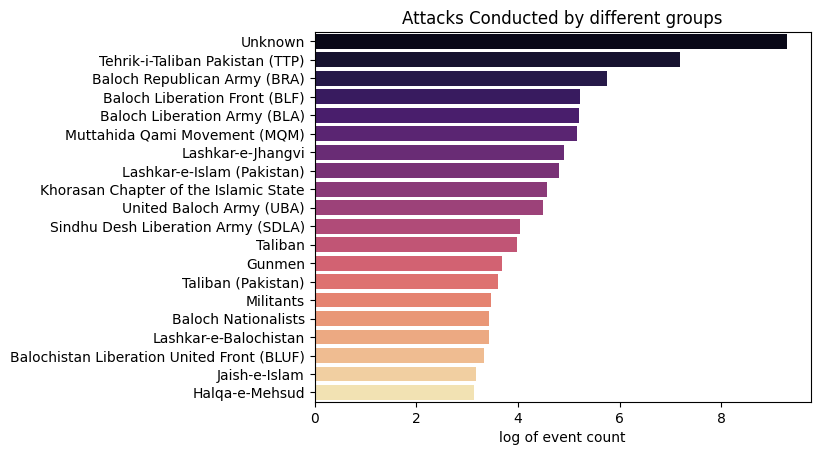

In [445]:
import numpy as np
data = terror_pak_gp.head(20)
data['eventid'] =  np.log(data['eventid'])
sns.barplot(x  = 'eventid', y  ='gname', palette = 'magma', hue = 'gname', data = data)
plt.xlabel('log of event count')
plt.ylabel('')
plt.title('Attacks Conducted by different groups');

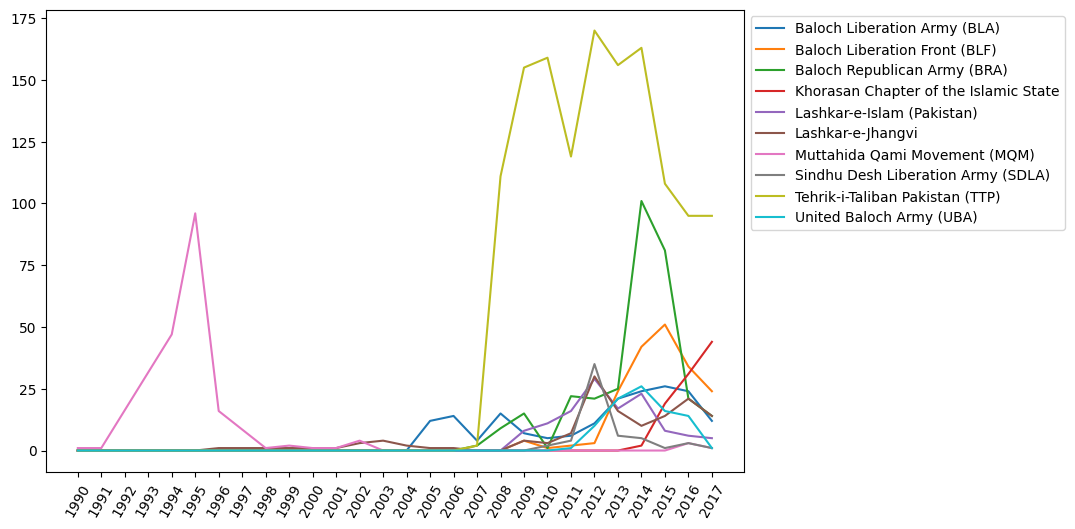

In [480]:
terror_pak_group10 = terror_pak[terror_pak['gname'].isin(terror_pak['gname'].value_counts()[1:11].index)]
terror_activity = pd.crosstab(terror_pak_group10.iyear, terror_pak_group10.gname)
plt.figure(figsize =(9,6))
for column in terror_activity.columns:
    plt.plot(terror_activity[column], label = column);
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(range(1990,2018,1),rotation = 60);

# Cities Terror Activity Analysis

In [447]:
terror_pak_city  = terror_pak.groupby('city')['eventid'].count().reset_index().sort_values(by = "eventid",ascending =False).reset_index(drop =True)

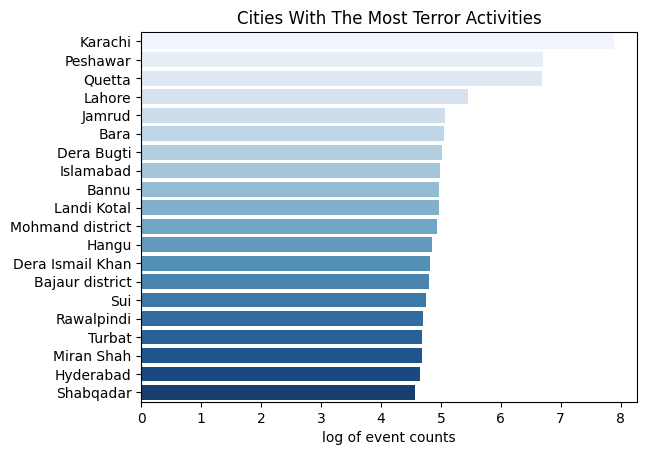

In [448]:
data = terror_pak_city.head(20)
data['eventid'] = np.log(data['eventid'])
sns.barplot(y = 'city', x= 'eventid', data=data, palette = 'Blues', hue = terror_pak_city['city'].head(20))
plt.title("Cities With The Most Terror Activities");
plt.xlabel('log of event counts')
plt.ylabel('');

# Karachi

In [449]:
terror_karachi  =  terror_pak[terror_pak['city']=='Karachi']
terror_karachi.isna().sum()

eventid                0
iyear                  0
country_txt            0
region_txt             0
provstate              0
city                   0
latitude               0
longitude              0
success                0
suicide                0
attacktype1            0
attacktype1_txt        0
targtype1_txt          0
targsubtype1_txt     213
gname                  0
nperps              1104
nkill                 17
nkillter            1092
nwound                74
nwoundte            1100
property               0
bubble_size            0
dtype: int64

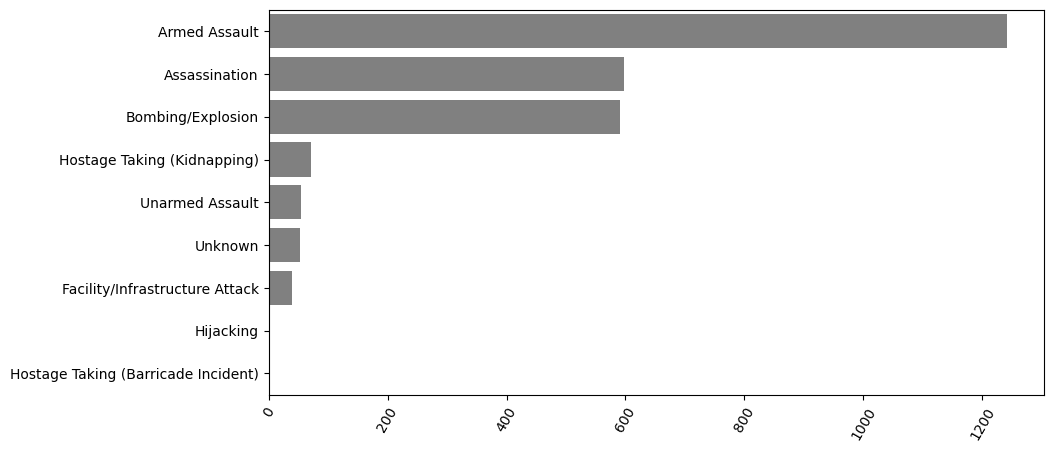

In [558]:
value_counts  = terror_karachi['attacktype1_txt'].value_counts().reset_index()
value_counts.columns = ['attacktype1_txt', 'count']
plt.figure(figsize =(10,5))
sns.barplot(y  = 'attacktype1_txt', x = 'count', data = value_counts, color = 'grey')
plt.xlabel('')
plt.ylabel('')
plt.xticks(range(0,1400,200), rotation = 60);

In [452]:
terror_karachi['attacktype1_txt'].value_counts()

attacktype1_txt
Armed Assault                          1241
Assassination                           597
Bombing/Explosion                       590
Hostage Taking (Kidnapping)              72
Unarmed Assault                          54
Unknown                                  52
Facility/Infrastructure Attack           40
Hijacking                                 3
Hostage Taking (Barricade Incident)       1
Name: count, dtype: int64

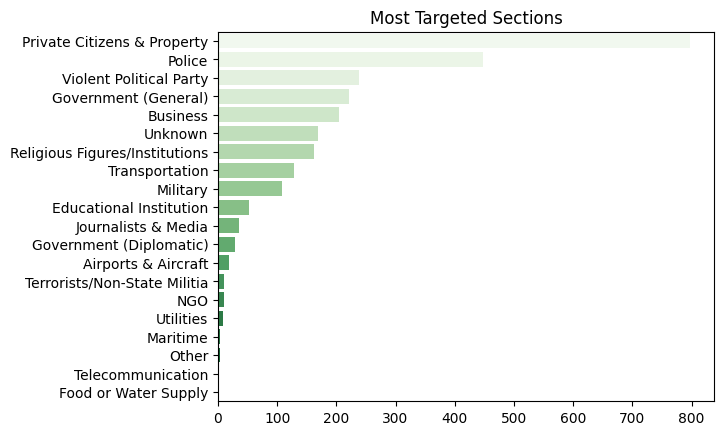

In [453]:
count = terror_karachi['targtype1_txt'].value_counts().reset_index()
count.columns = ['Target', 'Count']
data = count
sns.barplot(x='Count', y = 'Target', data = count, palette ='Greens', hue = 'Target' )
plt.xlabel('')
plt.ylabel('')
plt.title("Most Targeted Sections");

# Afghanistan

In [463]:
terror_afg = terror[terror['country_txt']=="Afghanistan"]
terror_afg.head()

,eventid,iyear,country_txt,region_txt,provstate,city,latitude,longitude,success,suicide,...,attacktype1_txt,targtype1_txt,targsubtype1_txt,gname,nperps,nkill,nkillter,nwound,nwoundte,property
1863,197305010002,1973,Afghanistan,South Asia,Kabul,Kabul,34.516895,69.147011,0,0,...,Unknown,Airports & Aircraft,Airline Officer/Personnel,Black December,1.0,0.0,NaN,1.0,NaN,0
7627,197902140010,1979,Afghanistan,South Asia,Kabul,Kabul,34.516895,69.147011,1,0,...,Hostage Taking (Kidnapping),Government (Diplomatic),"Diplomatic Personnel (outside of embassy, cons...",Shia Muslim extremists,2.0,1.0,NaN,0.0,NaN,0
9156,197908270005,1979,Afghanistan,South Asia,Ghazni,Ghazni,33.542622,68.415329,1,0,...,Bombing/Explosion,Transportation,Bus (excluding tourists),Muslim Guerrillas,NaN,50.0,NaN,0.0,NaN,1
9218,197909090001,1979,Afghanistan,South Asia,Herat,Herat,34.346722,62.197315,1,0,...,Armed Assault,Tourists,Tourist,Muslim Guerrillas,NaN,2.0,0.0,1.0,0.0,1
31132,198705310003,1987,Afghanistan,South Asia,Unknown,Unknown,NaN,NaN,1,0,...,Unarmed Assault,Private Citizens & Property,Student,Afghan Mujahideen,NaN,0.0,0.0,2.0,0.0,0


In [464]:
terror_afg = terror_afg.dropna(subset = ['latitude', 'longitude'], axis = 0)

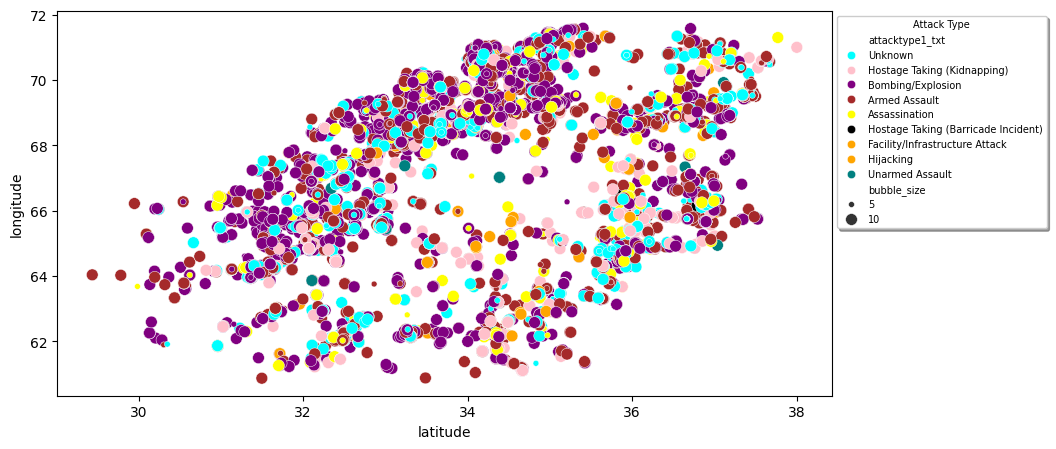

In [465]:
terror_afg = terror_afg.copy()
terror_afg['longitude'] = pd.to_numeric(terror_afg['longitude'])
terror_afg['latitude'] = pd.to_numeric(terror_afg['latitude'])
data = terror_afg
successful_size = 10
failure = 5
terror_afg['bubble_size'] = terror_afg['success'].apply(lambda x: failure if x == 0 else successful_size)
terror_afg['attacktype1'] = terror_afg['attacktype1_txt'].astype('category')
custom_palette = {'Bombing/Explosion':'purple', "Hijacking":'orange','Assassination':'yellow', 'Hostage Taking (Kidnapping)':'pink',"Armed Assault":'Brown',
                  'Unknown':'cyan', 'Facility/Infrastructure Attack':'Orange', 'Unarmed Assault':'teal','Hostage Taking (Barricade Incident)':'black'}
plt.figure(figsize =(10,5))
sns.scatterplot(y= 'longitude', x = 'latitude', palette = custom_palette, hue = 'attacktype1_txt', data = data , size = 'bubble_size')
plt.legend(
    title='Attack Type',
    title_fontsize='7',
    loc='upper left',
    fontsize='7',
    bbox_to_anchor=(1,1),
    frameon=True,
    shadow=True,
)


In [466]:
terror_afg_year = terror_afg.groupby('iyear')['eventid'].count().reset_index()
terror_afg_year.head()

,iyear,eventid
0,1973,1
1,1979,3
2,1988,11
3,1989,10
4,1990,2


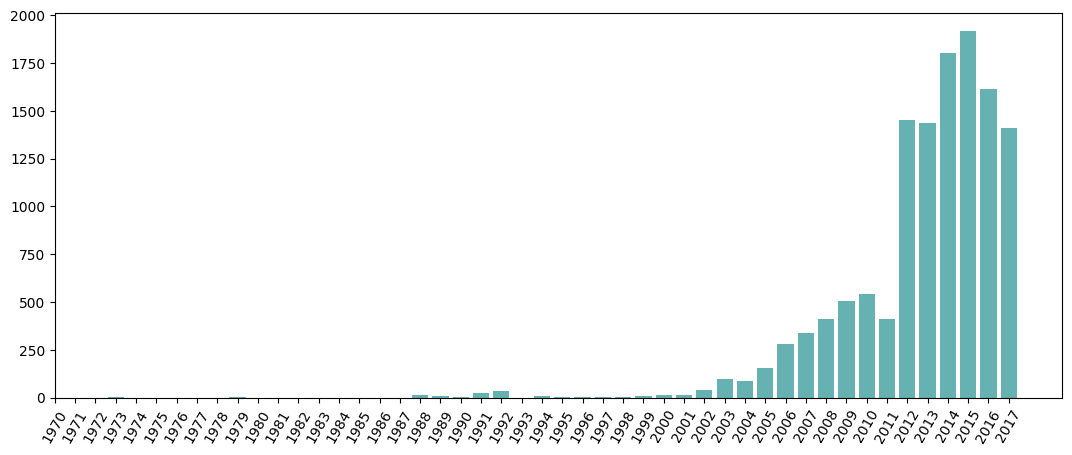

In [467]:
plt.figure(figsize = (13,5))
plt.bar(terror_afg_year['iyear'], terror_afg_year['eventid'], color = 'teal', alpha = 0.6)
plt.xticks(range(1970,2018, 1), rotation = 60);

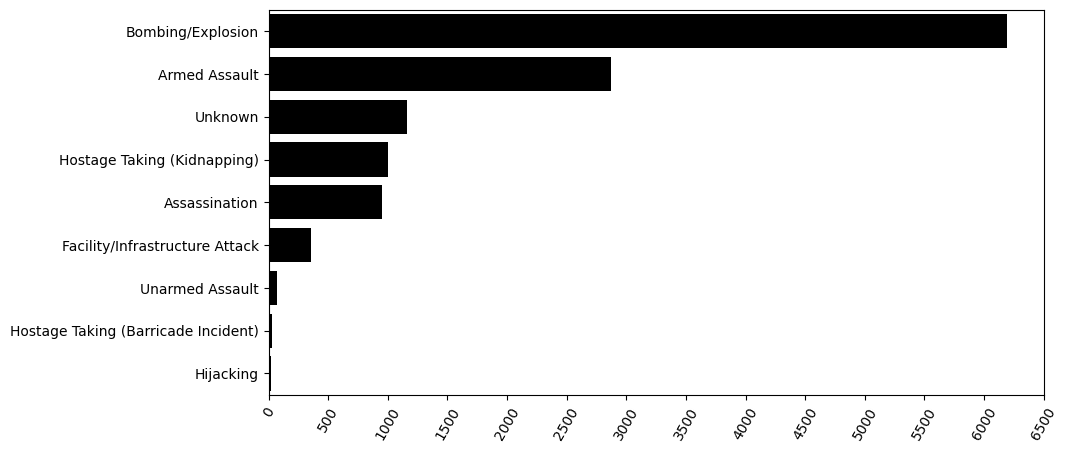

In [556]:
value_counts  = terror_afg['attacktype1_txt'].value_counts().reset_index()
value_counts.columns = ['attacktype1_txt', 'count']
plt.figure(figsize =(10,5))
sns.barplot(y  = 'attacktype1_txt', x = 'count', data = value_counts, color = 'black')
#plt.xticks(rotation = 60 )
plt.xlabel('')
plt.ylabel('')
plt.xticks(range(0,7000,500), rotation = 60);

In [470]:
terror_afg['attacktype1_txt'].value_counts()

attacktype1_txt
Bombing/Explosion                      6190
Armed Assault                          2869
Unknown                                1161
Hostage Taking (Kidnapping)            1000
Assassination                           951
Facility/Infrastructure Attack          353
Unarmed Assault                          72
Hostage Taking (Barricade Incident)      27
Hijacking                                16
Name: count, dtype: int64

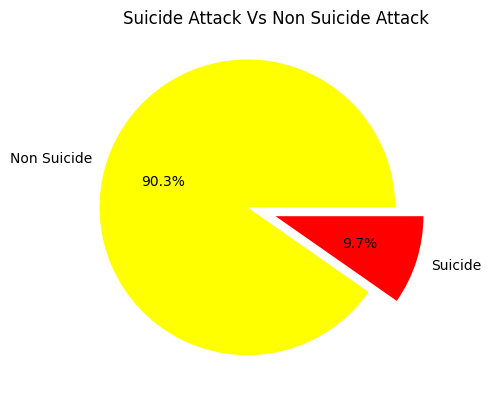

In [471]:
sizes =  terror_afg['suicide'].value_counts()
labels =  ['Non Suicide', 'Suicide']
colors = ["yellow", "red"]
plt.pie(sizes, labels=labels, autopct = "%1.1f%%", explode = (0.2,0), colors= colors);
plt.title("Suicide Attack Vs Non Suicide Attack");

In [472]:
terror_afg['suicide'].value_counts()

suicide
0    11412
1     1227
Name: count, dtype: int64

In [473]:
terror_afg['gname'].unique()
terror_afg_gp = terror_afg.groupby('gname')['eventid'].count().sort_values(ascending = False).reset_index()
terror_afg_gp.head(20)

,gname,eventid
0,Taliban,7402
1,Unknown,4744
2,Khorasan Chapter of the Islamic State,241
3,Haqqani Network,84
4,Hizb-I-Islami,42
5,Al-Qaida,19
6,Tehrik-i-Taliban Pakistan (TTP),15
7,Gunmen,9
8,Afghan Mujahideen,6
9,Afghan Guerrillas,6


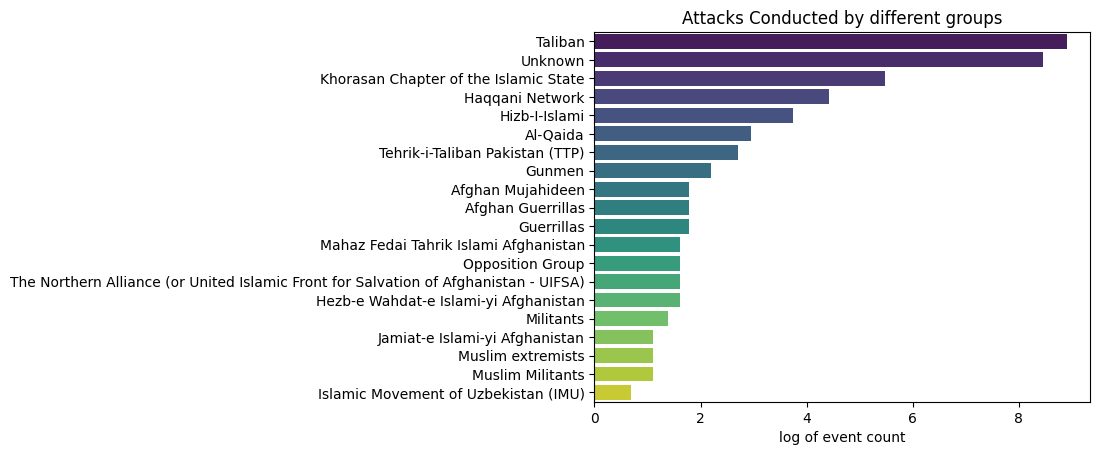

In [475]:
import numpy as np
data = terror_afg_gp.head(20)
data['eventid'] =  np.log(data['eventid'])
sns.barplot(x  = 'eventid', y  ='gname', palette = 'viridis', hue = 'gname', data = data)
plt.xlabel('log of event count')
plt.ylabel('')
plt.title('Attacks Conducted by different groups');

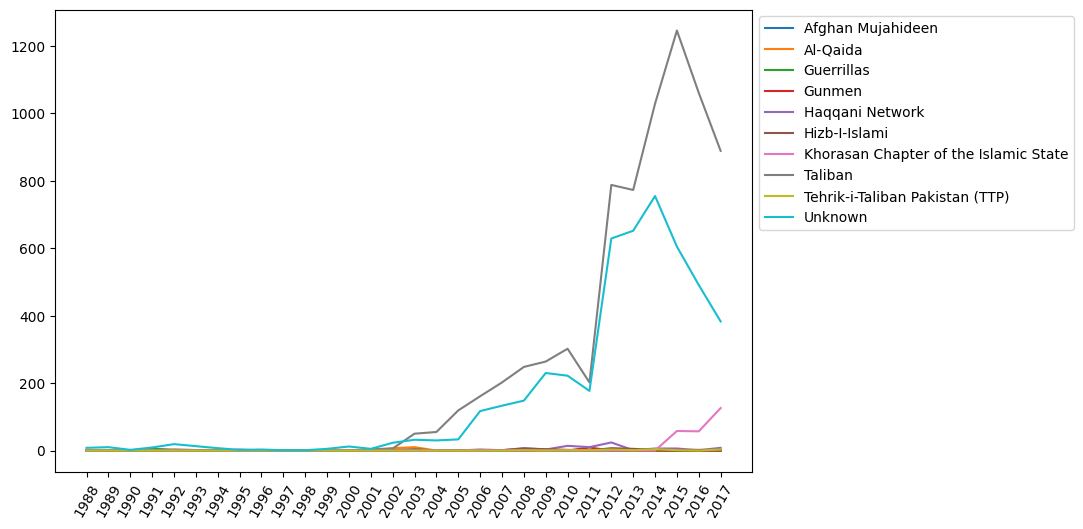

In [483]:
terror_afg_group10 = terror_afg[terror_afg['gname'].isin(terror_afg['gname'].value_counts()[0:10].index)]
terror_activity = pd.crosstab(terror_afg_group10.iyear, terror_afg_group10.gname)
plt.figure(figsize =(9,6))
for column in terror_activity.columns:
    plt.plot(terror_activity[column], label = column);
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(range(1988,2018,1),rotation = 60);

# Cities Terror Activity Analysis

In [485]:
terror_afg_city  = terror_afg.groupby('city')['eventid'].count().reset_index().sort_values(by = "eventid",ascending =False).reset_index(drop =True)

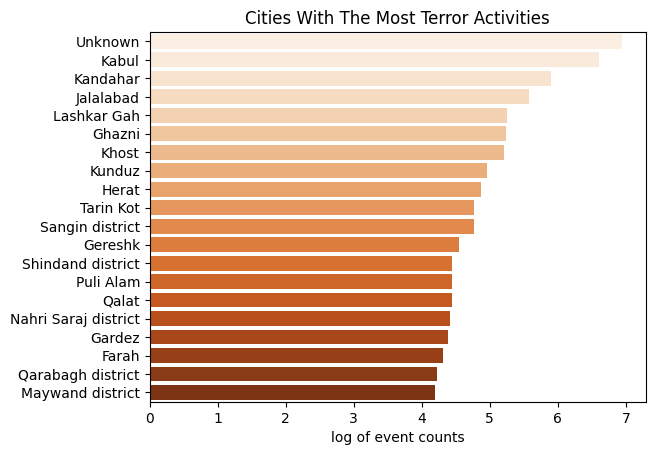

In [487]:
data = terror_afg_city.head(20)
data['eventid'] = np.log(data['eventid'])
sns.barplot(y = 'city', x= 'eventid', data=data, palette = 'Oranges', hue = terror_afg_city['city'].head(20))
plt.title("Cities With The Most Terror Activities");
plt.xlabel('log of event counts')
plt.ylabel('');

# Kabul

In [492]:
terror_kabul  =  terror[terror['city']=='Karachi']
terror_kabul.isna().sum()

eventid                0
iyear                  0
country_txt            0
region_txt             0
provstate              0
city                   0
latitude               1
longitude              1
success                0
suicide                0
attacktype1            0
attacktype1_txt        0
targtype1_txt          0
targsubtype1_txt     213
gname                  0
nperps              1104
nkill                 17
nkillter            1092
nwound                75
nwoundte            1100
property               0
dtype: int64

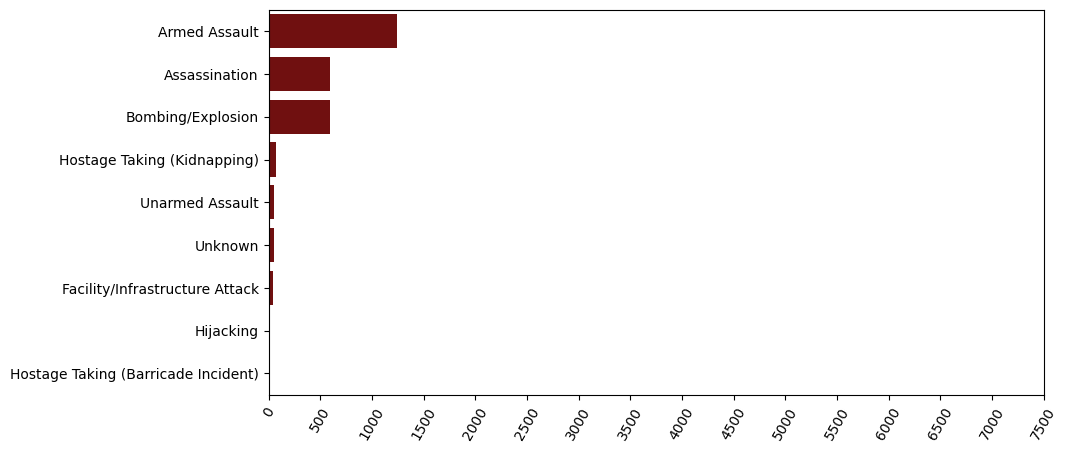

In [509]:
value_counts  = terror_kabul['attacktype1_txt'].value_counts().reset_index()
value_counts.columns = ['attacktype1_txt', 'count']
plt.figure(figsize =(10,5))
sns.barplot(y  = 'attacktype1_txt', x = 'count', data = value_counts, color = 'maroon')
plt.xlabel('')
plt.ylabel('')
plt.xticks(range(0,8000,500), rotation = 60);

In [504]:
terror_kabul['attacktype1_txt'].value_counts()

attacktype1_txt
Armed Assault                          1242
Assassination                           597
Bombing/Explosion                       590
Hostage Taking (Kidnapping)              72
Unarmed Assault                          54
Unknown                                  52
Facility/Infrastructure Attack           41
Hijacking                                 3
Hostage Taking (Barricade Incident)       1
Name: count, dtype: int64

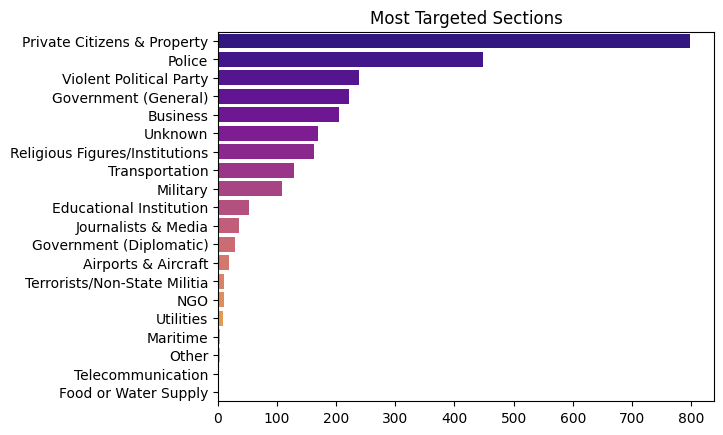

In [506]:
count = terror_kabul['targtype1_txt'].value_counts().reset_index()
count.columns = ['Target', 'Count']
data = count
sns.barplot(x='Count', y = 'Target', data = count, palette ='plasma', hue = 'Target' )
plt.xlabel('')
plt.ylabel('')
plt.title("Most Targeted Sections");

# India

In [507]:
terror_ind = terror[terror['country_txt']=="India"]
terror_ind.head()

,eventid,iyear,country_txt,region_txt,provstate,city,latitude,longitude,success,suicide,...,attacktype1_txt,targtype1_txt,targsubtype1_txt,gname,nperps,nkill,nkillter,nwound,nwoundte,property
1186,197202220004,1972,India,South Asia,Delhi,New Delhi,28.585836,77.153336,1,0,...,Hijacking,Airports & Aircraft,Aircraft (not at an airport),Palestinians,5.0,0.0,0.0,0.0,0.0,0
2764,197501190004,1975,India,South Asia,Bihar,Samastipur,25.863042,85.781004,1,0,...,Bombing/Explosion,Government (General),"Government Personnel (excluding police, military)",Ananda Marga,-99.0,4.0,0.0,0.0,0.0,0
3857,197605260001,1976,India,South Asia,Delhi,New Delhi,28.585836,77.153336,1,0,...,Bombing/Explosion,Airports & Aircraft,Airport,Unknown,NaN,0.0,NaN,0.0,NaN,1
5327,197709280004,1977,India,South Asia,Maharashtra,Bombay,19.075984,72.877656,1,0,...,Hijacking,Airports & Aircraft,Aircraft (not at an airport),Japanese Red Army (JRA),5.0,0.0,0.0,0.0,0.0,0
7337,197901130004,1979,India,South Asia,Assam,Unknown,26.200605,92.937574,1,0,...,Armed Assault,Police,Police Patrol (including vehicles and convoys),Naga People,NaN,NaN,NaN,NaN,NaN,1


In [510]:
terror_ind = terror_ind.dropna(subset = ['latitude', 'longitude'], axis = 0)

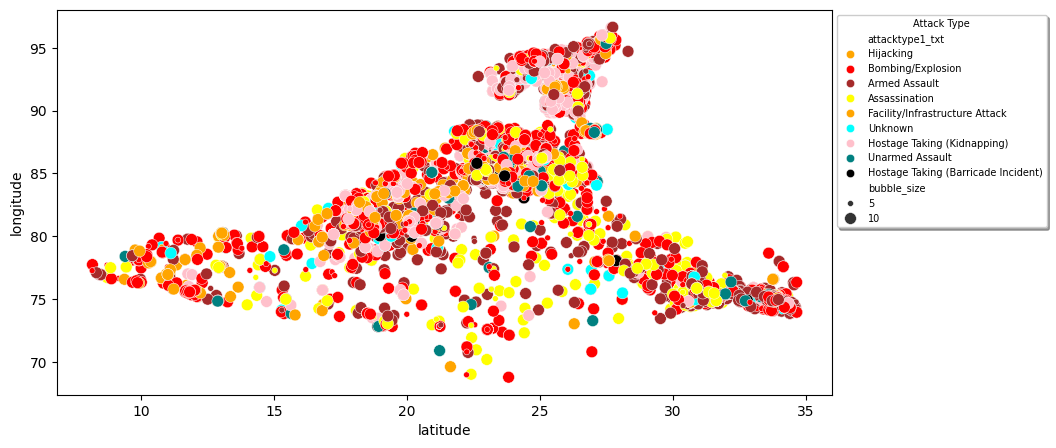

In [511]:
terror_ind = terror_ind.copy()
terror_ind['longitude'] = pd.to_numeric(terror_ind['longitude'])
terror_ind['latitude'] = pd.to_numeric(terror_ind['latitude'])
data = terror_ind
successful_size = 10
failure = 5
terror_ind['bubble_size'] = terror_ind['success'].apply(lambda x: failure if x == 0 else successful_size)
terror_ind['attacktype1'] = terror_ind['attacktype1_txt'].astype('category')
custom_palette = {'Bombing/Explosion':'red', "Hijacking":'orange','Assassination':'yellow', 'Hostage Taking (Kidnapping)':'pink',"Armed Assault":'Brown',
                  'Unknown':'cyan', 'Facility/Infrastructure Attack':'Orange', 'Unarmed Assault':'teal','Hostage Taking (Barricade Incident)':'black'}
plt.figure(figsize =(10,5))
sns.scatterplot(y= 'longitude', x = 'latitude', palette = custom_palette, hue = 'attacktype1_txt', data = data , size = 'bubble_size')
plt.legend(
    title='Attack Type',
    title_fontsize='7',
    loc='upper left',
    fontsize='7',
    bbox_to_anchor=(1,1),
    frameon=True,
    shadow=True,
)


In [512]:
terror_ind_year = terror_ind.groupby('iyear')['eventid'].count().reset_index()
terror_ind_year.head()

,iyear,eventid
0,1972,1
1,1975,1
2,1976,1
3,1977,1
4,1979,19


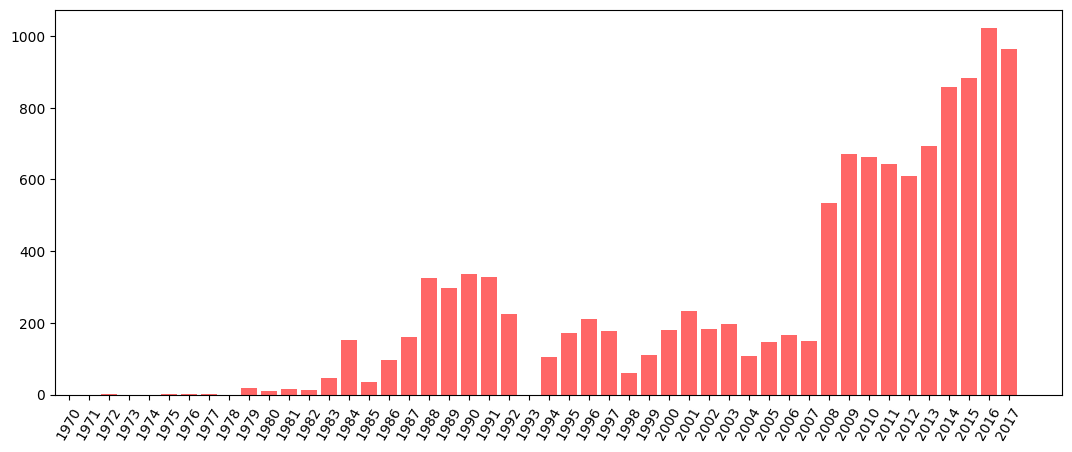

In [513]:
plt.figure(figsize = (13,5))
plt.bar(terror_ind_year['iyear'], terror_ind_year['eventid'], color = 'red', alpha = 0.6)
plt.xticks(range(1970,2018, 1), rotation = 60);

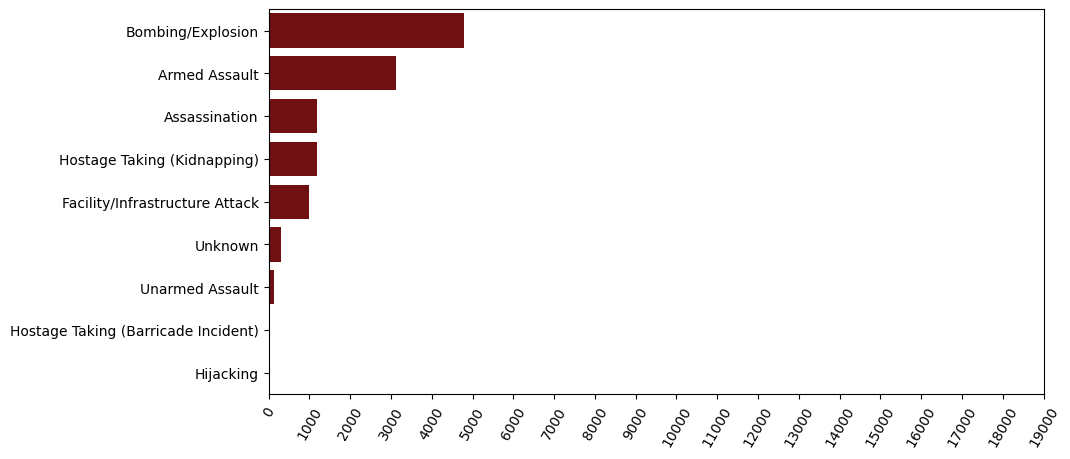

In [514]:
value_counts  = terror_ind['attacktype1_txt'].value_counts().reset_index()
value_counts.columns = ['attacktype1_txt', 'count']
plt.figure(figsize =(10,5))
sns.barplot(y  = 'attacktype1_txt', x = 'count', data = value_counts, color = 'maroon')
#plt.xticks(rotation = 60 )
plt.xlabel('')
plt.ylabel('')
plt.xticks(range(0,20000,1000), rotation = 60);

In [516]:
terror_afg['attacktype1_txt'].value_counts()

attacktype1_txt
Bombing/Explosion                      6190
Armed Assault                          2869
Unknown                                1161
Hostage Taking (Kidnapping)            1000
Assassination                           951
Facility/Infrastructure Attack          353
Unarmed Assault                          72
Hostage Taking (Barricade Incident)      27
Hijacking                                16
Name: count, dtype: int64

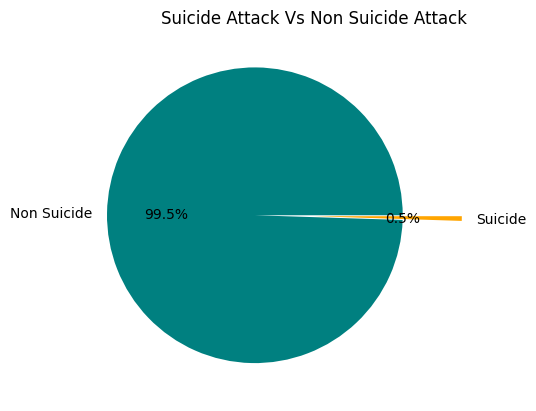

In [518]:
sizes =  terror_ind['suicide'].value_counts()
labels =  ['Non Suicide', 'Suicide']
colors = ["teal", "orange"]
plt.pie(sizes, labels=labels, autopct = "%1.1f%%", explode = (0.4,0), colors= colors);
plt.title("Suicide Attack Vs Non Suicide Attack");

In [519]:
terror_ind['suicide'].value_counts()

suicide
0    11741
1       60
Name: count, dtype: int64

In [520]:
terror_ind['gname'].unique()
terror_ind_gp = terror_ind.groupby('gname')['eventid'].count().sort_values(ascending = False).reset_index()
terror_ind_gp.head(20)

,gname,eventid
0,Unknown,4212
1,Communist Party of India - Maoist (CPI-Maoist),1875
2,Maoists,1394
3,Sikh Extremists,668
4,United Liberation Front of Assam (ULFA),357
5,Hizbul Mujahideen (HM),198
6,Lashkar-e-Taiba (LeT),187
7,National Democratic Front of Bodoland (NDFB),174
8,Garo National Liberation Army,166
9,Muslim Separatists,117


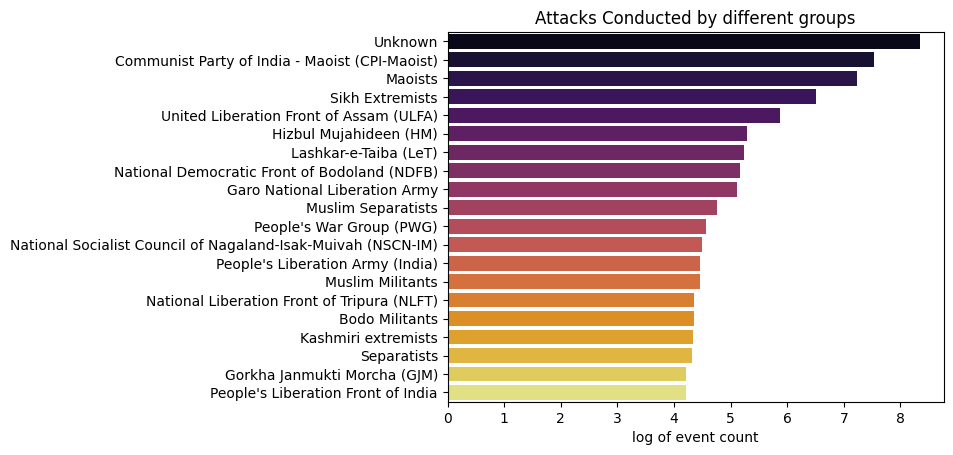

In [521]:
import numpy as np
data = terror_ind_gp.head(20)
data['eventid'] =  np.log(data['eventid'])
sns.barplot(x  = 'eventid', y  ='gname', palette = 'inferno', hue = 'gname', data = data)
plt.xlabel('log of event count')
plt.ylabel('')
plt.title('Attacks Conducted by different groups');

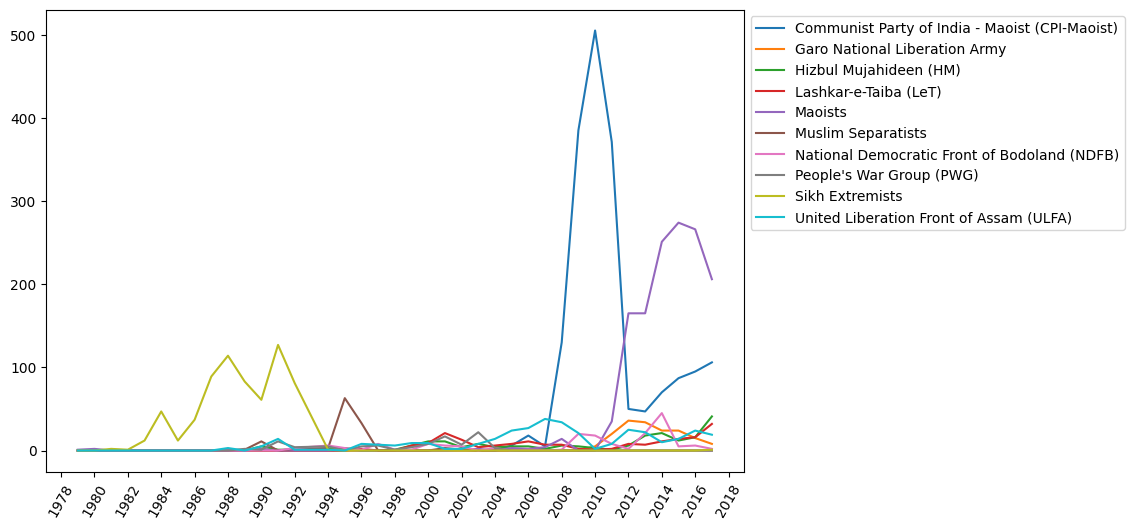

In [528]:
terror_ind_gp10 = terror_ind[terror_ind['gname'].isin(terror_ind['gname'].value_counts()[1:11].index)]
terror_activity = pd.crosstab(terror_ind_gp10.iyear,terror_ind_gp10.gname)
plt.figure(figsize =(9,6))
for column in terror_activity.columns:
    plt.plot(terror_activity[column], label = column);
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(range(1978,2019,2),rotation = 60);

# Cities Terror Activity Analysis

In [536]:
terror_ind_city  = terror_ind.groupby('city')['eventid'].count().reset_index().sort_values(by = "eventid",ascending =False).reset_index(drop =True)

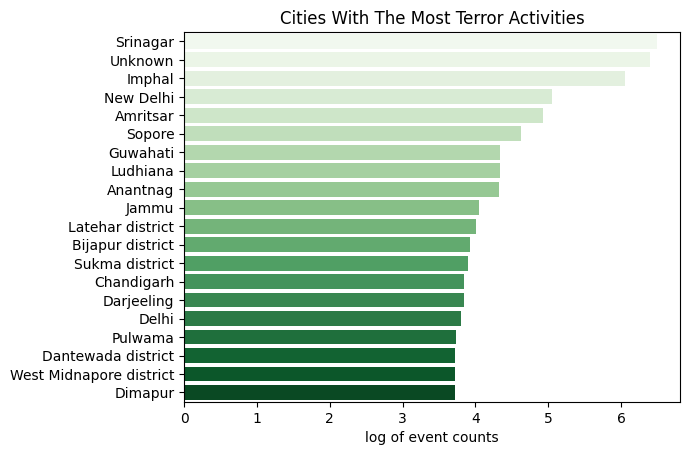

In [537]:
data = terror_ind_city.head(20)
data['eventid'] = np.log(data['eventid'])
sns.barplot(y = 'city', x= 'eventid', data=data, palette = 'Greens', hue = terror_ind_city['city'].head(20))
plt.title("Cities With The Most Terror Activities");
plt.xlabel('log of event counts')
plt.ylabel('');

# Srinagar

In [542]:
terror_srinagar  =  terror[terror['city']=='Srinagar']
terror_srinagar.isna().sum()

eventid               0
iyear                 0
country_txt           0
region_txt            0
provstate             0
city                  0
latitude              0
longitude             0
success               0
suicide               0
attacktype1           0
attacktype1_txt       0
targtype1_txt         0
targsubtype1_txt     46
gname                 0
nperps              491
nkill                14
nkillter            352
nwound               20
nwoundte            364
property              0
dtype: int64

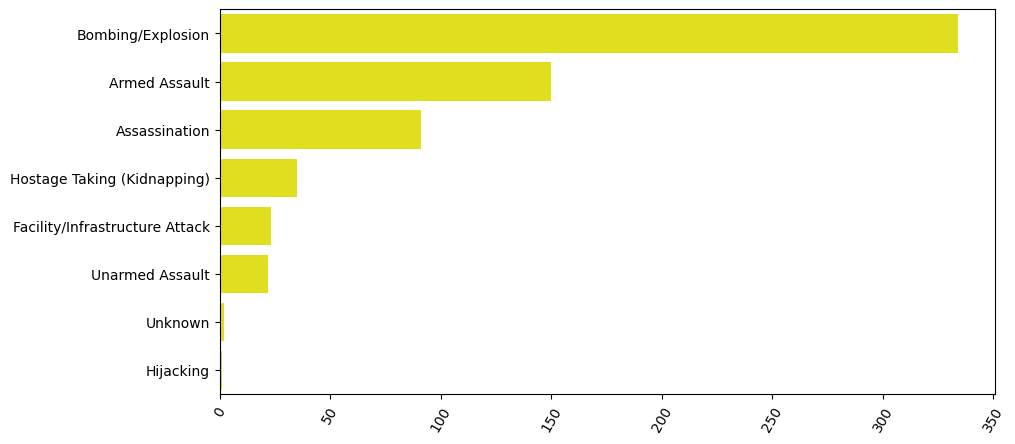

In [549]:
value_counts  = terror_srinagar['attacktype1_txt'].value_counts().reset_index()
value_counts.columns = ['attacktype1_txt', 'count']
plt.figure(figsize =(10,5))
sns.barplot(y  = 'attacktype1_txt', x = 'count', data = value_counts, color = 'yellow')
plt.xlabel('')
plt.ylabel('')
plt.xticks(range(0,400,50), rotation = 60);

In [550]:
terror_srinagar['attacktype1_txt'].value_counts()

attacktype1_txt
Bombing/Explosion                 334
Armed Assault                     150
Assassination                      91
Hostage Taking (Kidnapping)        35
Facility/Infrastructure Attack     23
Unarmed Assault                    22
Unknown                             2
Hijacking                           1
Name: count, dtype: int64

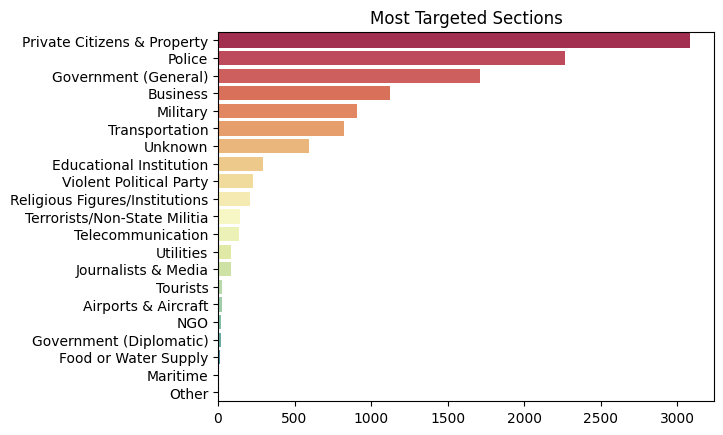

In [552]:
count = terror_ind['targtype1_txt'].value_counts().reset_index()
count.columns = ['Target', 'Count']
data = count
sns.barplot(x='Count', y = 'Target', data = count, palette ='Spectral', hue = 'Target' )
plt.xlabel('')
plt.ylabel('')
plt.title("Most Targeted Sections");

# Worldwide Analysis

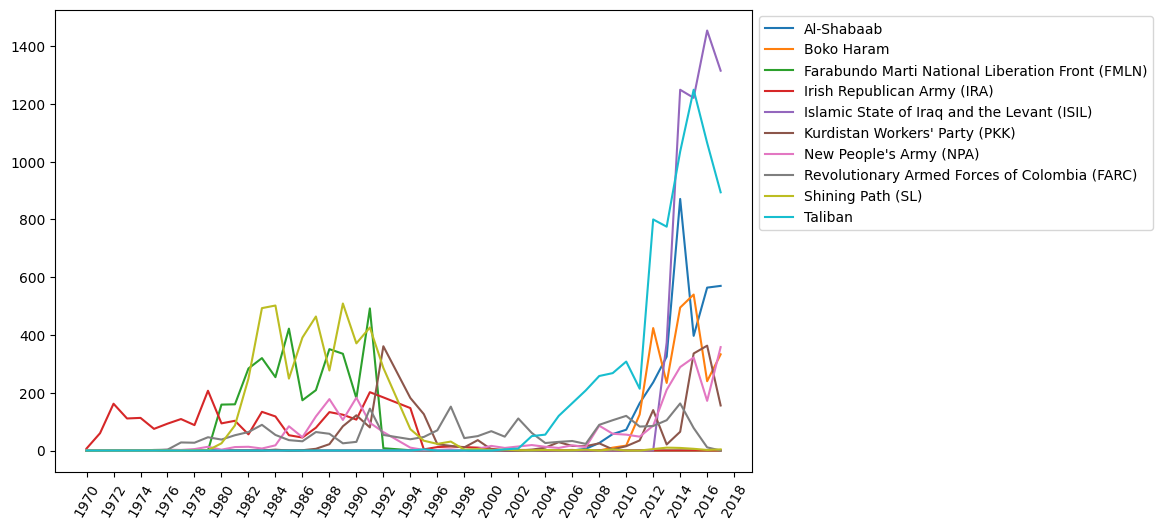

In [568]:
terror_world_gp10 = terror[terror['gname'].isin(terror['gname'].value_counts()[1:11].index)]
terror_activity = pd.crosstab(terror_world_gp10.iyear,terror_world_gp10.gname)
plt.figure(figsize =(9,6))
for column in terror_activity.columns:
    plt.plot(terror_activity[column], label = column);
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(range(1970,2019,2),rotation = 60);

In [588]:
world_attacks_kills = terror.groupby('country_txt')['nkill'].sum().reset_index()
worldwide_attacks =   terror.groupby('country_txt')['eventid'].count().reset_index()
merged =  pd.merge(world_attacks_kills, worldwide_attacks, on = 'country_txt')
merged=merged.rename(columns = {'country_txt' :'Country', 'nkill' : 'killed_Count', 'eventid':'Terror_Activity_Count'})
merged.head()

,Country,killed_Count,Terror_Activity_Count
0,Afghanistan,39384.0,12731
1,Albania,42.0,80
2,Algeria,11066.0,2743
3,Andorra,0.0,1
4,Angola,3043.0,499


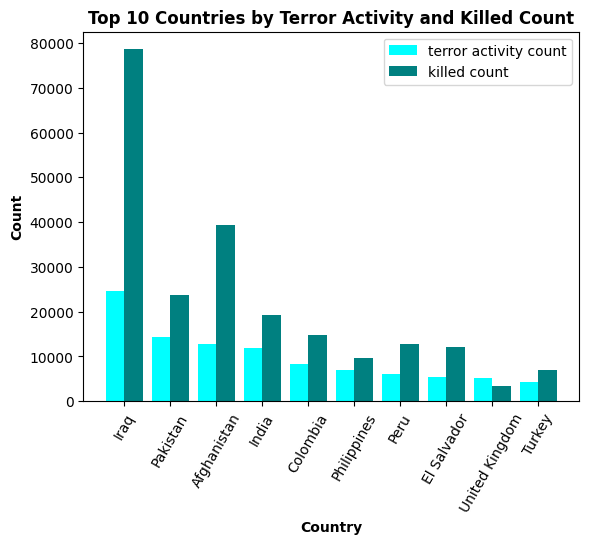

In [600]:
bar_width = 0.4
merged = merged.sort_values(by = 'Terror_Activity_Count', ascending = False).reset_index(drop=True).head(10)
r1=np.arange(len(merged['Country']))
r2=[x+bar_width for x in r1]
plt.bar(r1, merged['Terror_Activity_Count'], width = bar_width, color ='cyan', label = "terror activity count")
plt.bar(r2, merged['killed_Count'], width = bar_width, color = 'teal', label = "killed count")
plt.xticks([r + bar_width/2 for r in r1], merged['Country'], rotation=60);
plt.xlabel('Country', fontweight='bold')
plt.ylabel('Count', fontweight='bold')
plt.title('Top 10 Countries by Terror Activity and Killed Count', fontweight='bold')
plt.legend()